In [1]:
# Importing necessary libraries for data manipulation and visualization

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay)

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# The database for analysis is taken [here](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)


# About Dataset
Online booking has changed how people reserve hotel rooms. Many hotel bookings are canceled or result in no-shows, often due to changes in plans or schedule clashes. It's easy for guests to cancel for free or at a low cost, which is good for them but can reduce hotel earnings.

# Task  
Develop a predictive model to determine whether a customer will honor or cancel their hotel reservation, using available booking data and customer behavior patterns.

In [2]:
# Uploading a file from the local system (requires manual file selection in Google Colab environment)
from google.colab import files
uploaded = files.upload()

Saving Hotel Reservations.csv to Hotel Reservations.csv


# Data loading and review of the main characteristics of the dataset, including data types, dataset size, and checking for missing values.

In [3]:
# Loading the dataset from a CSV file and displaying the first five rows
df = pd.read_csv('Hotel Reservations.csv', sep = ',')
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
# Checking the data types of each column in the dataframe

df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [5]:
# Displaying the shape of the dataset (number of rows and columns)

df.shape

(36275, 19)

In [6]:
# Checking for missing values in each column of the dataset

df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

The quality of the data in this dataset appears to be quite high. Each column, ranging from guest details like the number of adults and children to booking specifics like room type, meal plan, and booking status, has zero missing values.


# Selecting important features to be used in the model. This may involve removing irrelevant or redundant features

In [7]:
# Creating a list of feature names, excluding 'Booking_ID' and 'booking_status'

features =  [column for column in df.columns if column not in ['Booking_ID', 'booking_status']]
features

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

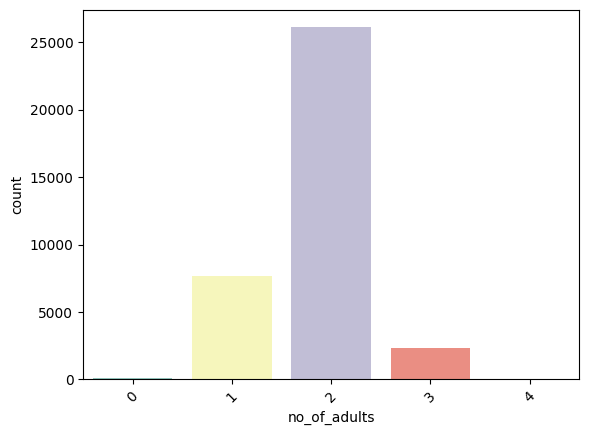

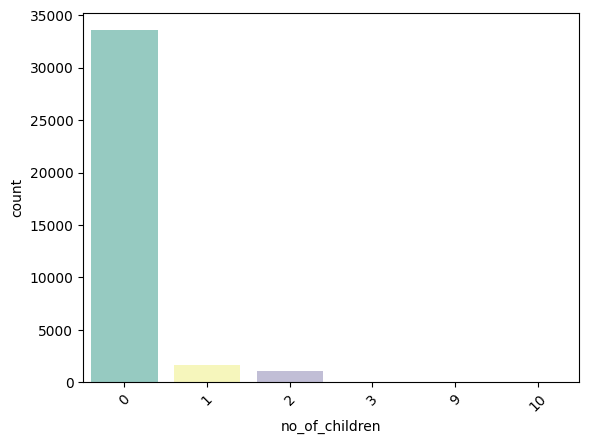

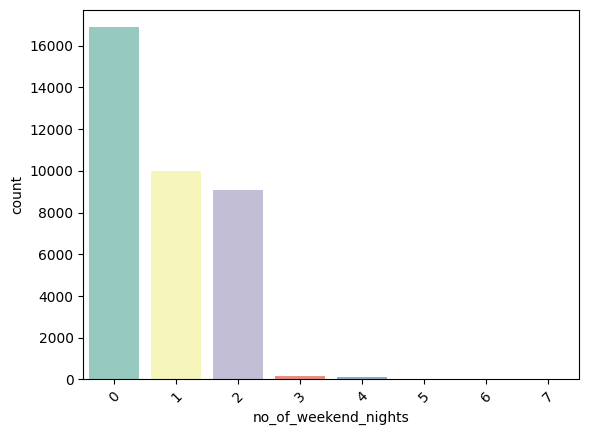

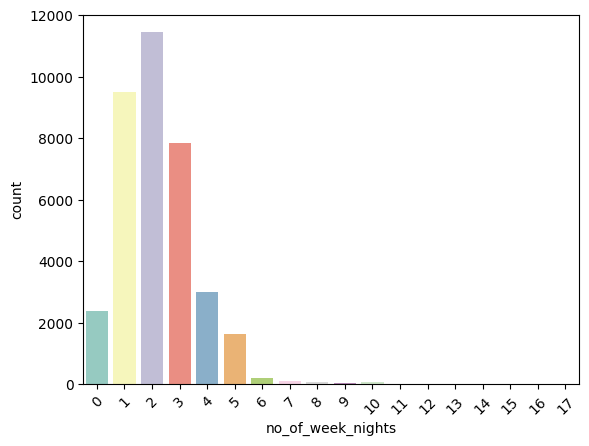

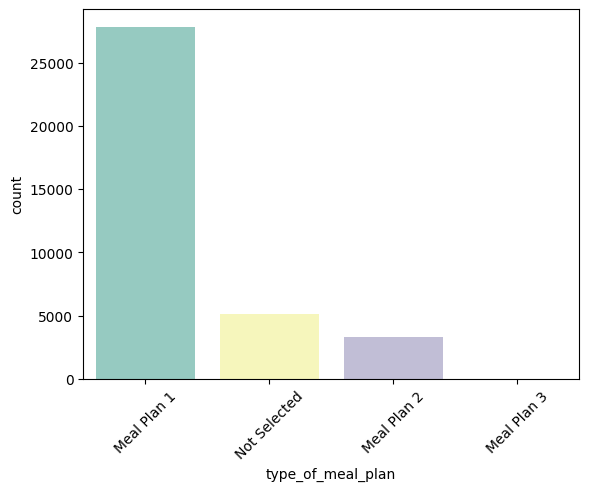

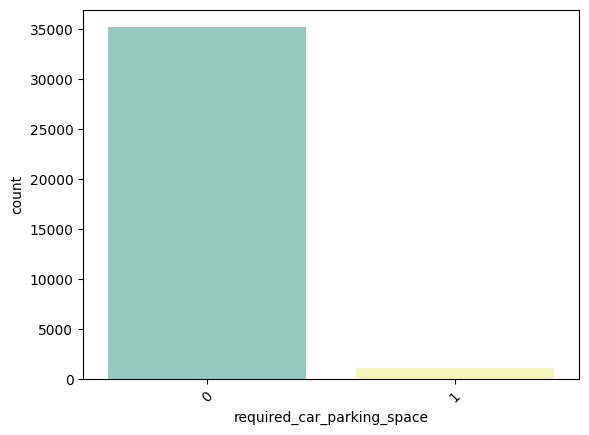

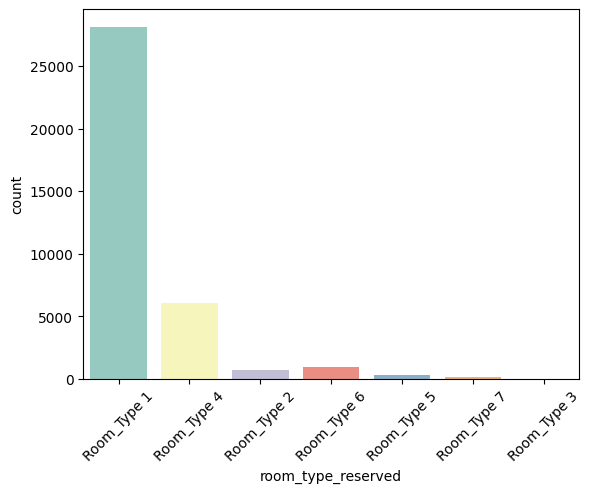

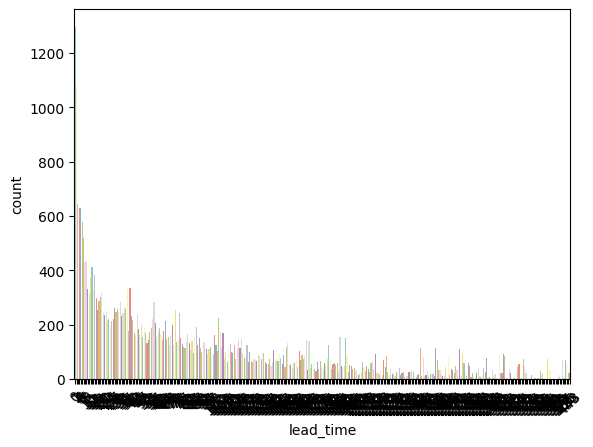

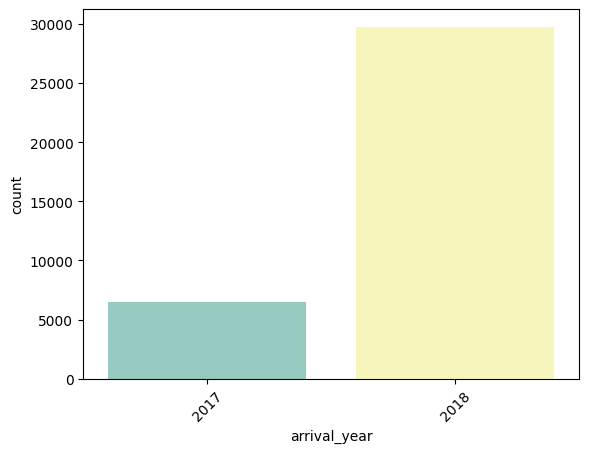

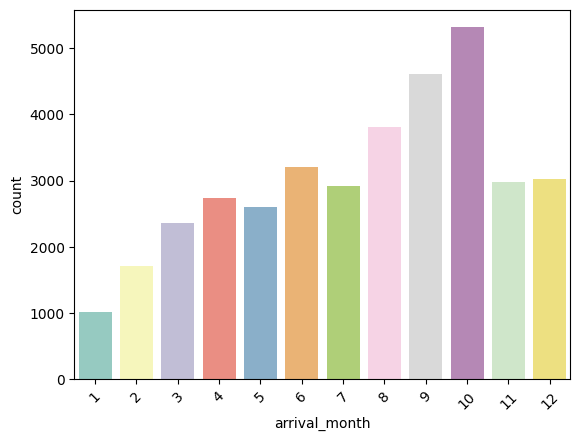

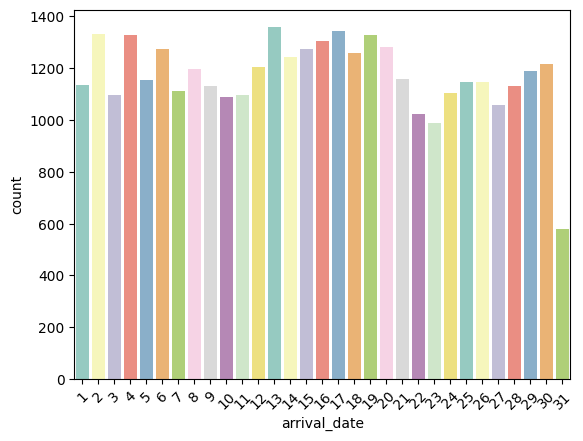

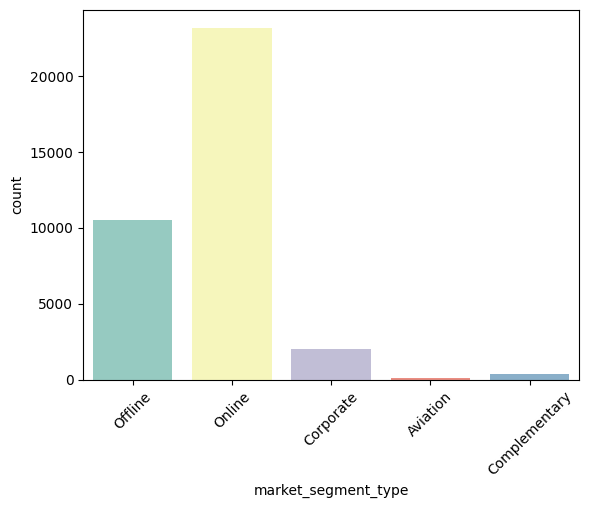

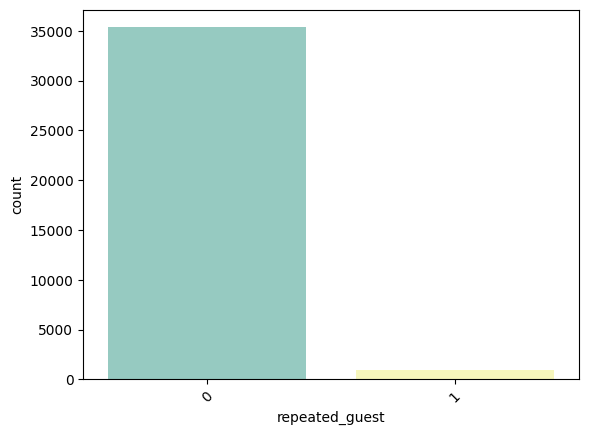

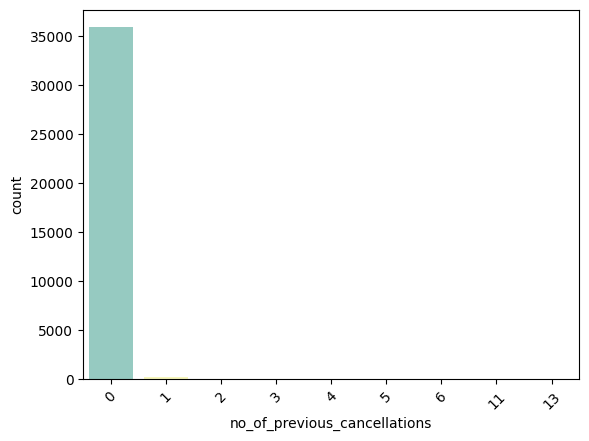

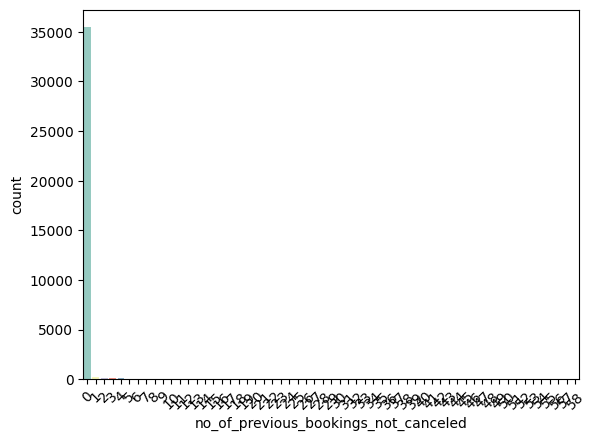

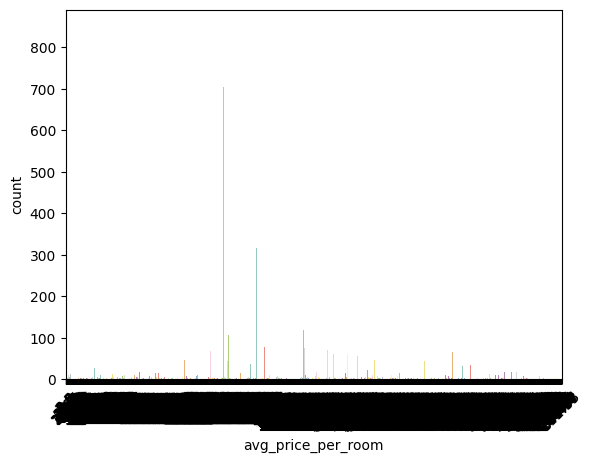

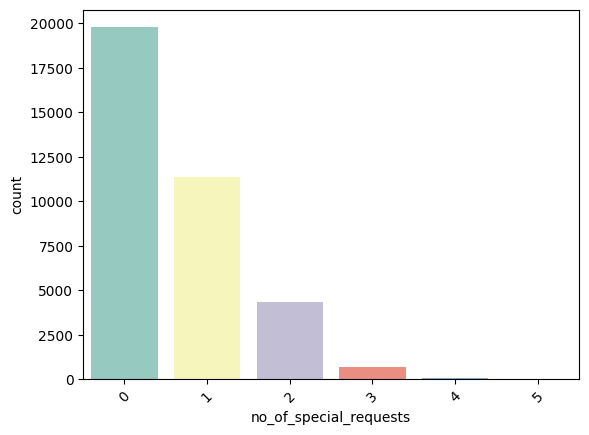

In [8]:
# Plotting the distribution of each feature using count plots

for f in features:
  sns.countplot(x=f, data= df, palette='Set3')
  plt.xticks(rotation=45)
  plt.show()

In [9]:
# Displaying statistical summary of the features

df[features].describe().round(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00
mean,1.84,0.11,0.81,2.20,0.03,85.23,2017.82,7.42,15.60,0.03,0.02,0.15,103.42,0.62
std,0.52,0.40,0.87,1.41,0.17,85.93,0.38,3.07,8.74,0.16,0.37,1.75,35.09,0.79
min,0.00,0.00,0.00,0.00,0.00,0.00,2017.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.00,0.00,1.00,0.00,17.00,2018.00,5.00,8.00,0.00,0.00,0.00,80.30,0.00
50%,2.00,0.00,1.00,2.00,0.00,57.00,2018.00,8.00,16.00,0.00,0.00,0.00,99.45,0.00
75%,2.00,0.00,2.00,3.00,0.00,126.00,2018.00,10.00,23.00,0.00,0.00,0.00,120.00,1.00
max,4.00,10.00,7.00,17.00,1.00,443.00,2018.00,12.00,31.00,1.00,13.00,58.00,540.00,5.00


**Average Composition of Guests:** On average, bookings are made for 1.84 adults and 0.11 children. This indicates that most reservations are made for individual travelers or couples.

**Duration of Stay:** On average, guests spend 1,5 nights.

**Demand for Parking:** Only 3% of bookings require a car parking space, which could suggest a low need for parking spaces or the popularity of alternative modes of transport.

**Booking Lead Time:** The average time from booking to arrival is 85.23 days, suggesting that trips are planned well in advance.

**Repeat Bookings:** Only 3% of bookings are repeat reservations, which might indicate a large number of new clients or low guest loyalty.

**Cancellation History:** A small number of guests (0.02 on average) had a history of previous cancellations.

**Average Price per Room:** On average, the room price is around 103.42 dollars, with a maximum price of 540 dollars.

**Special Requests:** On average, there are 0.62 special requests per booking, indicating a certain level of individual guest needs.

In [10]:
# Counting the occurrences of each booking status

df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

We have a high number of cancellations - a third of all bookings. However, the cancellation rate among clients who have made previous bookings is low (0.02 on average)

#Logistic regression

Categorical features encoding

In [11]:
# Selecting columns with numeric data types

numeric_columns = df.select_dtypes(include=['int64','float64']).columns
numeric_columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [12]:
# Selecting specific columns for one-hot encoding

select_columns = ['type_of_meal_plan','room_type_reserved','market_segment_type']
select_columns

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

In [13]:
# Applying one-hot encoding to the selected categorical columns

encoder = OneHotEncoder(handle_unknown="ignore")
encoded_data = encoder.fit_transform(df[select_columns])
select_col_enc = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(select_columns))
df_enc = pd.concat([df[numeric_columns],select_col_enc], axis=1)

In [14]:
# Listing the names of the encoded features for model training

features_enc =  df_enc.columns

In [15]:
X = df_enc[features_enc]
y = df['booking_status']

In [16]:
# Splitting the dataset into training and testing sets

X_train_enc, X_test_enc, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

print('Train', X_train_enc.shape, y_train.shape)
print('Test', X_test_enc.shape, y_test.shape)

Train (24304, 30) (24304,)
Test (11971, 30) (11971,)


1 - Not_Canceled
0 - Canceled

In [20]:
# Function to encode target variables for both training and testing sets

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc


In [21]:
#Encoding the target variable using Label Encoder
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)


Standardize the features

In [22]:
# Applying Standard Scaler to normalize features for model training
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_enc)
X_test_std = sc.transform(X_test_enc)

Construction of the model

In [23]:
# Function to fit and evaluate a logistic regression model

def fit_evaluate_model(X_train, y_train, X_test, y_test):
    model = LogisticRegression(solver='lbfgs')
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(classification_report(y_train, y_train_pred, digits=3))
    print(classification_report(y_test, y_test_pred, digits=3))
    return model

In [24]:
# Applying the first model for prediction and evaluation

model1 = fit_evaluate_model(X_train_std, y_train_enc,X_test_std,y_test_enc)

              precision    recall  f1-score   support

           0      0.740     0.635     0.684      8034
           1      0.832     0.890     0.860     16270

    accuracy                          0.806     24304
   macro avg      0.786     0.763     0.772     24304
weighted avg      0.802     0.806     0.802     24304

              precision    recall  f1-score   support

           0      0.727     0.633     0.677      3851
           1      0.836     0.887     0.861      8120

    accuracy                          0.806     11971
   macro avg      0.782     0.760     0.769     11971
weighted avg      0.801     0.806     0.802     11971



In [25]:
# Generating the confusion matrix for model evaluation

cm = confusion_matrix(y_test_enc, model1.predict(X_test_std))

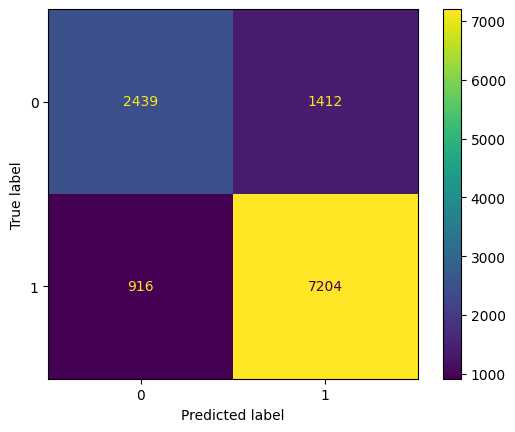

In [26]:
# Displaying the confusion matrix using a visual plot

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model1.classes_)
disp.plot()

plt.show();

# We chose a metric  F1-Score. The higher F1-score for class 1 (0.860 and 0.861) suggests the model is particularly effective at predicting cancellations. And now we try to improve it

#Chi2 criterion

In [27]:
# Feature selection function to improve model performance
def select_features(X_train, y_train, X_test, method, k):
    fs = SelectKBest(score_func=method, k=k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0, no_of_adults: 30.846424222173077
Feature 1, no_of_children: 65.30071275049731
Feature 2, no_of_weekend_nights: 68.23885955025901
Feature 3, no_of_week_nights: 181.4378731010406
Feature 4, required_car_parking_space: 186.31008566219265
Feature 5, lead_time: 399970.3752501769
Feature 6, arrival_year: 0.057974494291525715
Feature 7, arrival_month: 6.331896099037485
Feature 8, arrival_date: 15.618105470337433
Feature 9, repeated_guest: 278.9747107988848
Feature 10, no_of_previous_cancellations: 178.5238883098657
Feature 11, no_of_previous_bookings_not_canceled: 1875.7909588680536
Feature 12, avg_price_per_room: 6305.817881694957
Feature 13, no_of_special_requests: 1514.820578877068
Feature 14, type_of_meal_plan_Meal Plan 1: 25.06693383057714
Feature 15, type_of_meal_plan_Meal Plan 2: 177.41905683960192
Feature 16, type_of_meal_plan_Meal Plan 3: 0.38516384652259267
Feature 17, type_of_meal_plan_Not Selected: 0.8586727532478162
Feature 18, room_type_reserved_Room_Type 1: 2.1729428

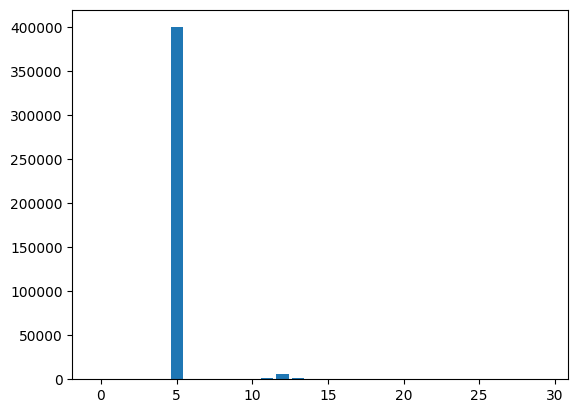

In [30]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc, method=chi2, k='all')

for i in range(len(fs.scores_)):
        print('Feature {}, {}: {}'.format(i, features_enc[i], fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# The Chi-square method indicates that the most influential features are feature 5, lead_time, and feature 12, avg_price_per_room. We will build a logistic regression model based on these features

In [31]:
X_chi = X[['lead_time', 'avg_price_per_room']]

In [32]:
X_train_chi, X_test_chi, y_train_chi, y_test_chi = train_test_split(X_chi, y, test_size=0.33, random_state=1)

print('Train', X_train_chi.shape, y_train_chi.shape)
print('Test', X_test_chi.shape, y_test_chi.shape)

Train (24304, 2) (24304,)
Test (11971, 2) (11971,)


In [33]:
y_train_chi_enc, y_test_chi_enc = prepare_targets(y_train_chi, y_test_chi)

In [34]:
sc = StandardScaler()
X_train_chi_std = sc.fit_transform(X_train_chi)
X_test_chi_std = sc.transform(X_test_chi)

In [35]:
model2 = fit_evaluate_model(X_train_chi_std, y_train_chi_enc,X_test_chi_std,y_test_chi_enc)

              precision    recall  f1-score   support

           0      0.707     0.465     0.561      8034
           1      0.774     0.905     0.834     16270

    accuracy                          0.759     24304
   macro avg      0.741     0.685     0.698     24304
weighted avg      0.752     0.759     0.744     24304

              precision    recall  f1-score   support

           0      0.692     0.466     0.557      3851
           1      0.781     0.902     0.837      8120

    accuracy                          0.762     11971
   macro avg      0.736     0.684     0.697     11971
weighted avg      0.752     0.762     0.747     11971



In [36]:
cm_chi = confusion_matrix(y_test_chi_enc, model2.predict(X_test_chi_std ))

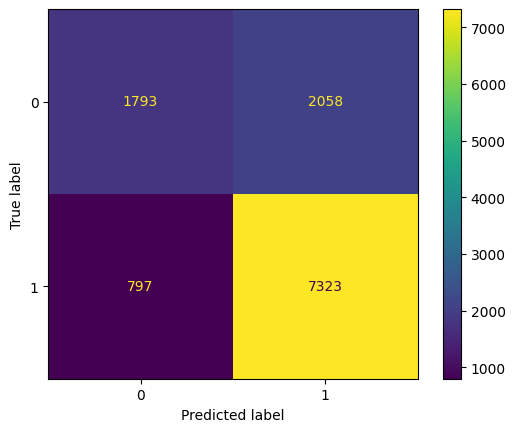

In [37]:
disp_final = ConfusionMatrixDisplay(confusion_matrix=cm_chi,
                              display_labels=model2.classes_)
disp_final.plot()

plt.show();

# We observe that there has been no improvement in the metrics. Let's try to improve the model by changing the threshold

In [38]:
# Function to fit and evaluate the logistic regression model with a specific threshold

def fit_evaluate_model_proba(X_train, y_train, X_test, y_test,THRESHOLD):
    model = LogisticRegression(solver='lbfgs')
    model.fit(X_train, y_train)
    y_train_pred_proba = model.predict_proba(X_train)
    y_test_pred_proba = model.predict_proba(X_test)
    y_train_pred = np.where(y_train_pred_proba[:,1] >= THRESHOLD, 1, 0)
    y_test_pred = np.where(y_test_pred_proba[:,1] >= THRESHOLD, 1, 0)
    print(classification_report(y_train, y_train_pred, digits=3))
    print(classification_report(y_test, y_test_pred, digits=3))
    return model

In [39]:
# Setting a threshold value for model prediction
THRESHOLD = 0.3

In [40]:
# Applying the model with a specific threshold for prediction
model_proba = fit_evaluate_model_proba(X_train_std, y_train_enc,X_test_std,y_test_enc,THRESHOLD)

              precision    recall  f1-score   support

           0      0.827     0.398     0.537      8034
           1      0.763     0.959     0.850     16270

    accuracy                          0.773     24304
   macro avg      0.795     0.678     0.693     24304
weighted avg      0.784     0.773     0.746     24304

              precision    recall  f1-score   support

           0      0.835     0.410     0.550      3851
           1      0.775     0.962     0.858      8120

    accuracy                          0.784     11971
   macro avg      0.805     0.686     0.704     11971
weighted avg      0.794     0.784     0.759     11971



In [41]:
# Retrieving prediction probabilities from the trained model

y_pred_prob = model_proba.predict_proba(X_train_std)

In [42]:
# Plotting the distribution of prediction probabilities
y_pred_prob

array([[0.59215127, 0.40784873],
       [0.33686847, 0.66313153],
       [0.38657375, 0.61342625],
       ...,
       [0.46479549, 0.53520451],
       [0.56153175, 0.43846825],
       [0.73565357, 0.26434643]])

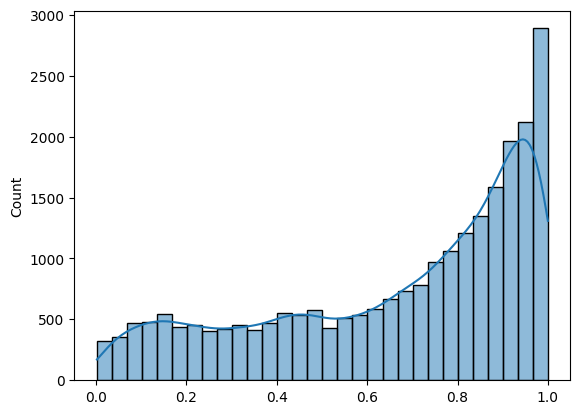

In [43]:
# Plotting the distribution of prediction probabilities
sns.histplot(y_pred_prob[:,1], bins=30, kde=True);

In [44]:
# Applying the model with the new threshold for prediction
THRESHOLD = 0.4

In [45]:
model_proba2 = fit_evaluate_model_proba(X_train_std, y_train_enc,X_test_std,y_test_enc,THRESHOLD)

              precision    recall  f1-score   support

           0      0.796     0.517     0.627      8034
           1      0.797     0.934     0.860     16270

    accuracy                          0.796     24304
   macro avg      0.796     0.726     0.743     24304
weighted avg      0.796     0.796     0.783     24304

              precision    recall  f1-score   support

           0      0.790     0.529     0.634      3851
           1      0.807     0.933     0.866      8120

    accuracy                          0.803     11971
   macro avg      0.799     0.731     0.750     11971
weighted avg      0.802     0.803     0.791     11971



The value of f1-score for class 1 for both training and test data did not improve, we did not choose a better threshold, we leave 0.5

So, the logistic regression model turned out to be the best model among those tested

In [46]:
# Generating classification reports for both training and testing sets
print(classification_report(y_train_enc, model1.predict(X_train_std), digits=3))
print(classification_report(y_test_enc, model1.predict(X_test_std), digits=3))

              precision    recall  f1-score   support

           0      0.740     0.635     0.684      8034
           1      0.832     0.890     0.860     16270

    accuracy                          0.806     24304
   macro avg      0.786     0.763     0.772     24304
weighted avg      0.802     0.806     0.802     24304

              precision    recall  f1-score   support

           0      0.727     0.633     0.677      3851
           1      0.836     0.887     0.861      8120

    accuracy                          0.806     11971
   macro avg      0.782     0.760     0.769     11971
weighted avg      0.801     0.806     0.802     11971



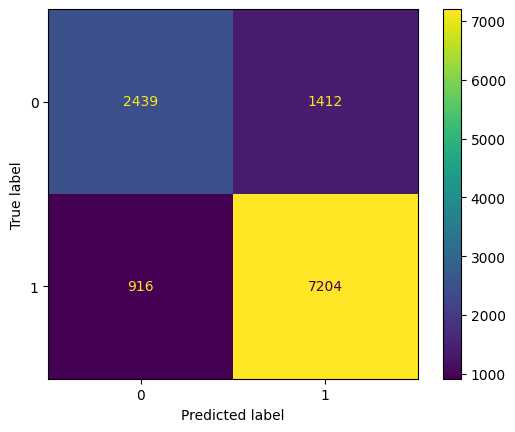

In [47]:
# Displaying the confusion matrix for the model's predictions

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model1.classes_)
disp.plot()

plt.show();

Roc-curve

In [48]:
# Calculating and plotting the ROC curve for model evaluation
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_enc, model1.predict(X_test_std))
roc_auc = auc(fpr, tpr)

In [49]:
# Defining a function to plot the ROC curve
def plot_roc(fpr, tpr, roc_auc):
    plt.figure()
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

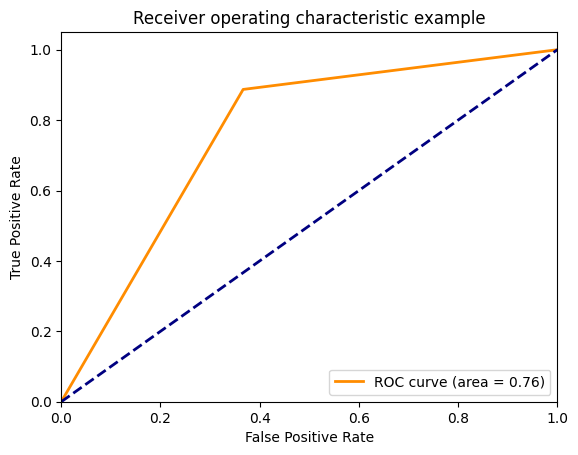

In [50]:
# Plotting the ROC curve using the defined function
plot_roc(fpr, tpr, roc_auc)

#Decision tree

In [51]:
# Building and training a decision tree classifier
clf_decisiontree = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
clf_decisiontree = clf_decisiontree.fit(X_train_std, y_train_enc)
y_predtree_train = clf_decisiontree.predict(X_train_std)#
y_predtree_test = clf_decisiontree.predict(X_test_std)
print(classification_report(y_train_enc, y_predtree_train, digits=3))
print(classification_report(y_test_enc, y_predtree_test, digits=3))

              precision    recall  f1-score   support

           0      0.759     0.697     0.727      8034
           1      0.856     0.891     0.873     16270

    accuracy                          0.827     24304
   macro avg      0.808     0.794     0.800     24304
weighted avg      0.824     0.827     0.825     24304

              precision    recall  f1-score   support

           0      0.754     0.695     0.723      3851
           1      0.861     0.892     0.876      8120

    accuracy                          0.829     11971
   macro avg      0.807     0.794     0.800     11971
weighted avg      0.826     0.829     0.827     11971



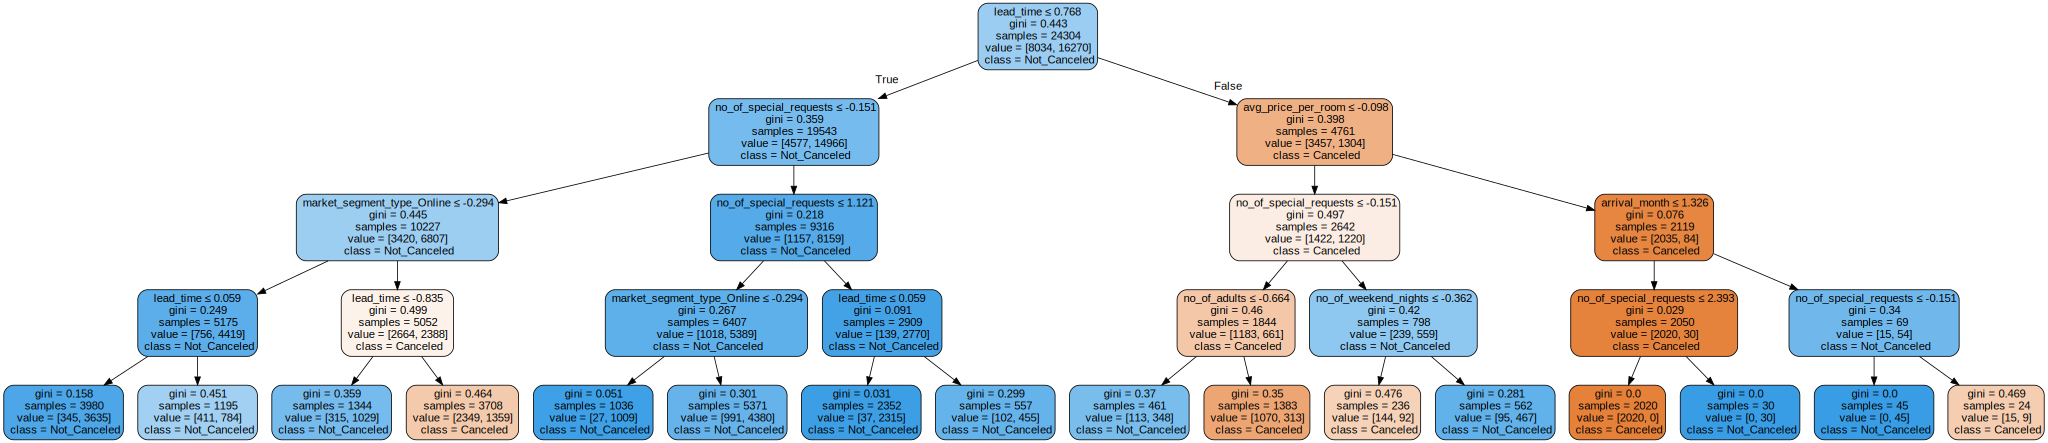

In [52]:
# Exporting and visualizing the decision tree structure
dot_data = tree.export_graphviz(clf_decisiontree,
                     out_file=None,
                     feature_names = features_enc,
                     class_names = ['Canceled', 'Not_Canceled'],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [53]:
# Displaying the parameters of the trained decision tree model
params = clf_decisiontree.get_params()
for key, value in params.items():
    print(f"{key}: {value}")# ваш код тут

ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 4
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
random_state: 1
splitter: best


In [54]:
# Setting up hyperparameters for decision tree model optimization
param_grid = {
    'class_weight': [None, 'balanced'],
    'max_depth': [4, 5, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=clf_decisiontree, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_enc, y_train_enc)

print("The best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


The best parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.8851185804121382


In [55]:
# Finding the best decision tree model based on the grid search
best_model = DecisionTreeClassifier(random_state=1,
                                    max_depth=grid_search.best_params_['max_depth'])
best_model.fit(X_train_enc, y_train_enc)
y_best_train = best_model.predict(X_train_enc)
y_best_test = best_model.predict(X_test_enc)
print(classification_report(y_train_enc, y_best_train, digits=3))
print(classification_report(y_test_enc, y_best_test, digits=3))

              precision    recall  f1-score   support

           0      0.801     0.703     0.749      8034
           1      0.862     0.914     0.887     16270

    accuracy                          0.844     24304
   macro avg      0.831     0.808     0.818     24304
weighted avg      0.842     0.844     0.841     24304

              precision    recall  f1-score   support

           0      0.793     0.699     0.743      3851
           1      0.865     0.914     0.889      8120

    accuracy                          0.845     11971
   macro avg      0.829     0.806     0.816     11971
weighted avg      0.842     0.845     0.842     11971



In [57]:
cm_tree = confusion_matrix(y_test_enc, y_best_test)

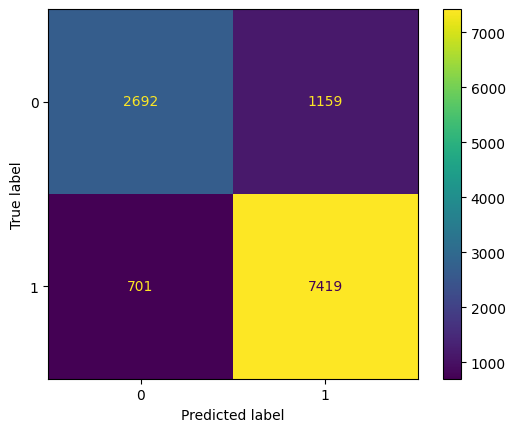

In [58]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree,
                              display_labels=best_model.classes_)
disp.plot()

plt.show();

Classification using a decision tree turned out to be the best. With a certain selection of parameters, it was possible to improve f1 and accuracy to 0.889 and 0.845, respectively, compared to the metrics of the logistic regression model with 0.861 and 0.806